Implementing the Lorenz attractor


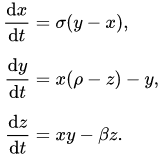
The equations relate the properties of a two-dimensional fluid layer uniformly warmed from below and cooled from above. In particular, the equations describe the rate of change of three quantities with respect to time: x is proportional to the rate of convection, y to the horizontal temperature variation, and z to the vertical temperature variation.The constants σ, ρ, and β are system parameters proportional to the Prandtl number, Rayleigh number, and certain physical dimensions of the layer itself.

Lorenz used the values σ = 10, β = 8/3 and ρ = 28

For nicer animations, see: https://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/
also: https://ipywidgets.readthedocs.io/en/stable/

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [49]:
def lorenz(n = 1000, dt = .001, start = np.array([1, 1, 1]), sigma = 10, beta = 8/3, rho = 28):
    
    trajectory = np.zeros((n,3))
    trajectory[0] = start
    
    for i in range(1, n):
        
        x, y, z = trajectory[i-1]
        
        trajectory[i,0] = x + sigma * (y - x) * dt # x + 1
        trajectory[i,1] = y + (x * (rho - z) - y) * dt # y + 1
        trajectory[i,2] = z + (x * y - beta * z) * dt # z + 1
    
    
    return trajectory

In [55]:
lor = lorenz(n = 10000000, dt = .00001)

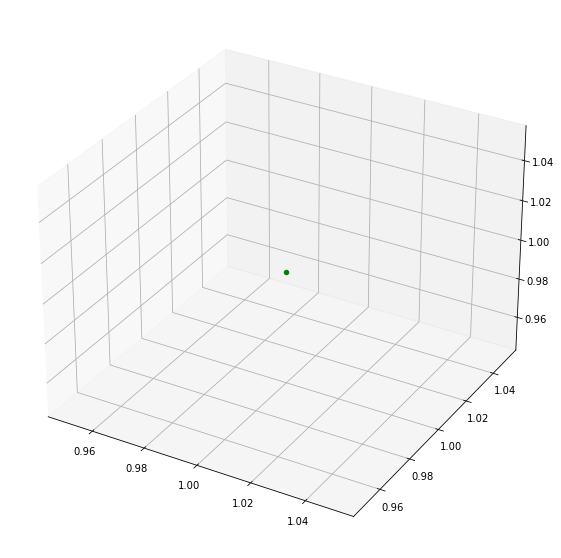

/home/xavfunk/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [94]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

#ax.plot(lor[:,0], lor[:,1], lor[:,2])
pt1 = ax.scatter(*lor[0], color = 'g')


In [104]:
# animation function. This is called sequentially
def drawframe(n):
    #print(n)
#    pt1._offsets3d = (lor[0,0], lor[0,1], lor[0,2])
    pt1._offsets3d = (1,1,1)
    return pt1
    #    txt_title.set_text('Frame = {0:4d}'.format(n))

In [105]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=1000, interval=1, blit=False)

In [106]:
from IPython.display import HTML
HTML(anim.to_html5_video())

IndexError: invalid index to scalar variable.

# From wiki

/tmp/ipykernel_85054/2632057571.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


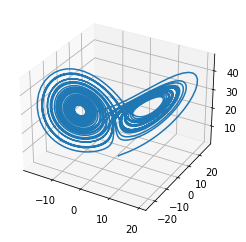

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

In [6]:
np.zeros((1000,3))[0,1]

0.0